In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Load the data

In [2]:
activity_daily_df = pd.read_csv('../../../../data/public_data/cleaned/fitbit/cleaned_daily_activity.csv')

In [3]:
activity_daily_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [4]:
activity_daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1234 non-null   int64  
 1   ActivityDate              1234 non-null   object 
 2   TotalSteps                1234 non-null   int64  
 3   TotalDistance             1234 non-null   float64
 4   TrackerDistance           1234 non-null   float64
 5   LoggedActivitiesDistance  1234 non-null   float64
 6   VeryActiveDistance        1234 non-null   float64
 7   ModeratelyActiveDistance  1234 non-null   float64
 8   LightActiveDistance       1234 non-null   float64
 9   SedentaryActiveDistance   1234 non-null   float64
 10  VeryActiveMinutes         1234 non-null   int64  
 11  FairlyActiveMinutes       1234 non-null   int64  
 12  LightlyActiveMinutes      1234 non-null   int64  
 13  SedentaryMinutes          1234 non-null   int64  
 14  Calories

## Set ActivityHour column to index and convert to datetime data type

In [5]:
activity_daily_df = activity_daily_df.set_index('ActivityDate')
activity_daily_df.index = pd.to_datetime(activity_daily_df.index)

### Forecasting for specific user 2347167796:

In [6]:
selected_user = 2347167796

In [7]:
user_activity_daily_df = activity_daily_df[activity_daily_df['Id'] == selected_user]

### Forecasting on Average Intensity

In [8]:
user_activity_daily_df = user_activity_daily_df[['TotalSteps']]

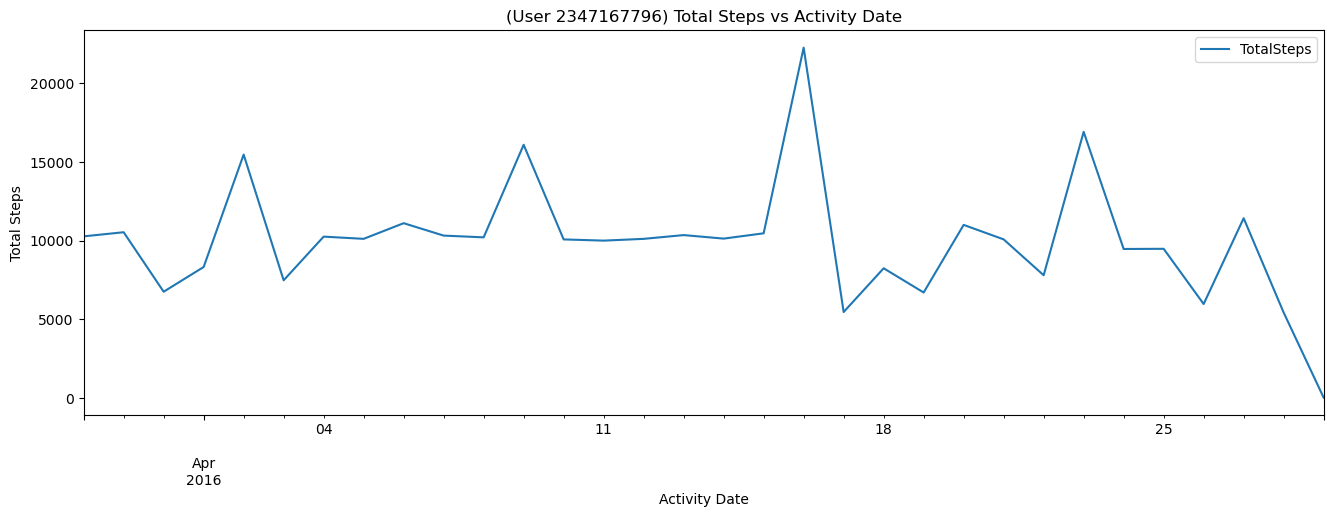

In [9]:
user_activity_daily_df.plot(figsize=(16, 5))
plt.title(f'(User {selected_user}) Total Steps vs Activity Date')
plt.ylabel('Total Steps')
plt.xlabel("Activity Date")
plt.show()

# Adding extra features

In [10]:
# user_activity_daily_df['hour'] = user_activity_daily_df.index.hour
user_activity_daily_df['dayofweek'] = user_activity_daily_df.index.dayofweek
user_activity_daily_df['dayofmonth'] = user_activity_daily_df.index.day
user_activity_daily_df['dayofyear'] = user_activity_daily_df.index.dayofyear
user_activity_daily_df['isweekend'] = user_activity_daily_df['dayofweek'] >= 5

In [11]:
user_activity_daily_df

,TotalSteps,dayofweek,dayofmonth,dayofyear,isweekend
ActivityDate,,,,,
2016-03-29,10272,1,29,89,False
2016-03-30,10533,2,30,90,False
2016-03-31,6760,3,31,91,False
2016-04-01,8328,4,1,92,False
2016-04-02,15459,5,2,93,True
2016-04-03,7485,6,3,94,True
2016-04-04,10254,0,4,95,False
2016-04-05,10114,1,5,96,False
2016-04-06,11107,2,6,97,False


## Exploration of the new features

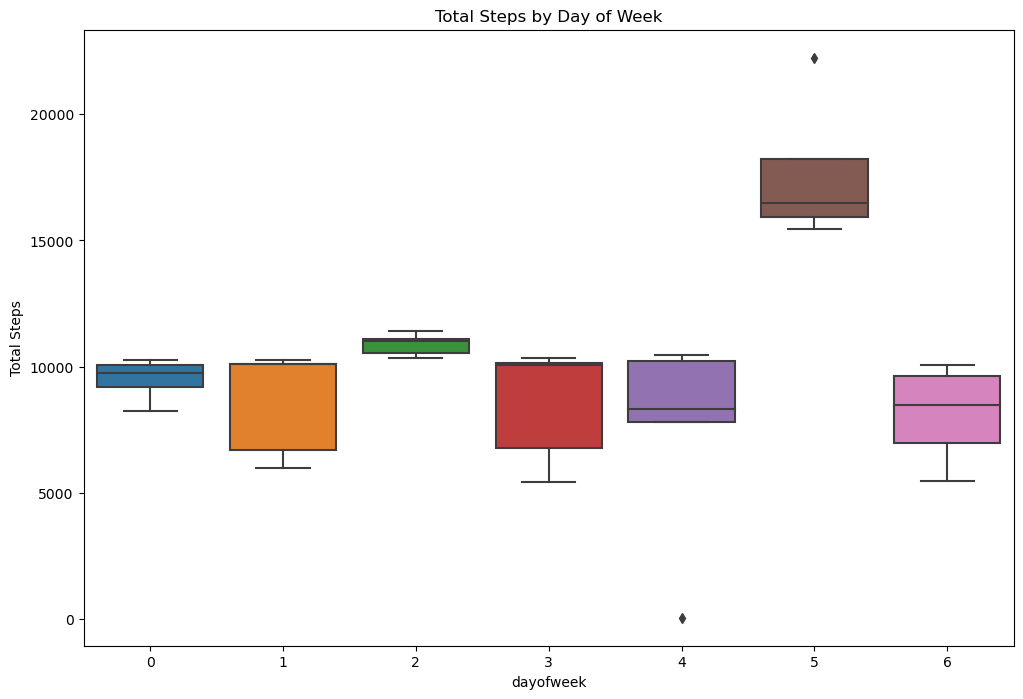

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=user_activity_daily_df, x='dayofweek', y='TotalSteps')
ax.set_title('Total Steps by Day of Week')
plt.ylabel('Total Steps')
plt.show()

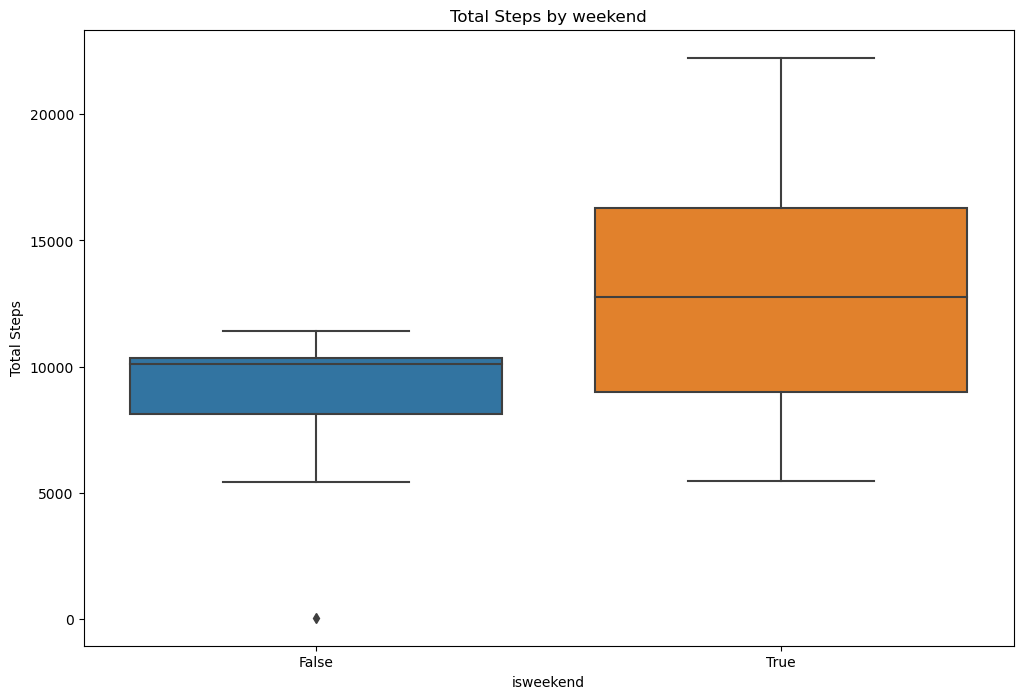

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=user_activity_daily_df, x='isweekend', y='TotalSteps')
ax.set_title('Total Steps by weekend')
plt.ylabel('Total Steps')
plt.show()

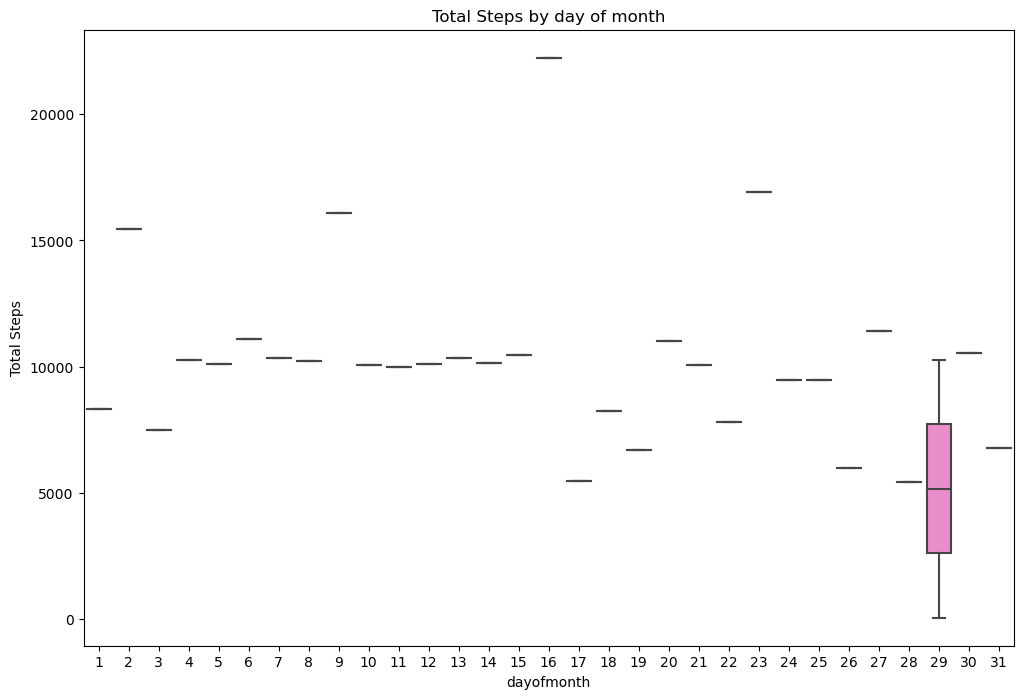

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=user_activity_daily_df, x='dayofmonth', y='TotalSteps')
ax.set_title('Total Steps by day of month')
plt.ylabel('Total Steps')
plt.show()

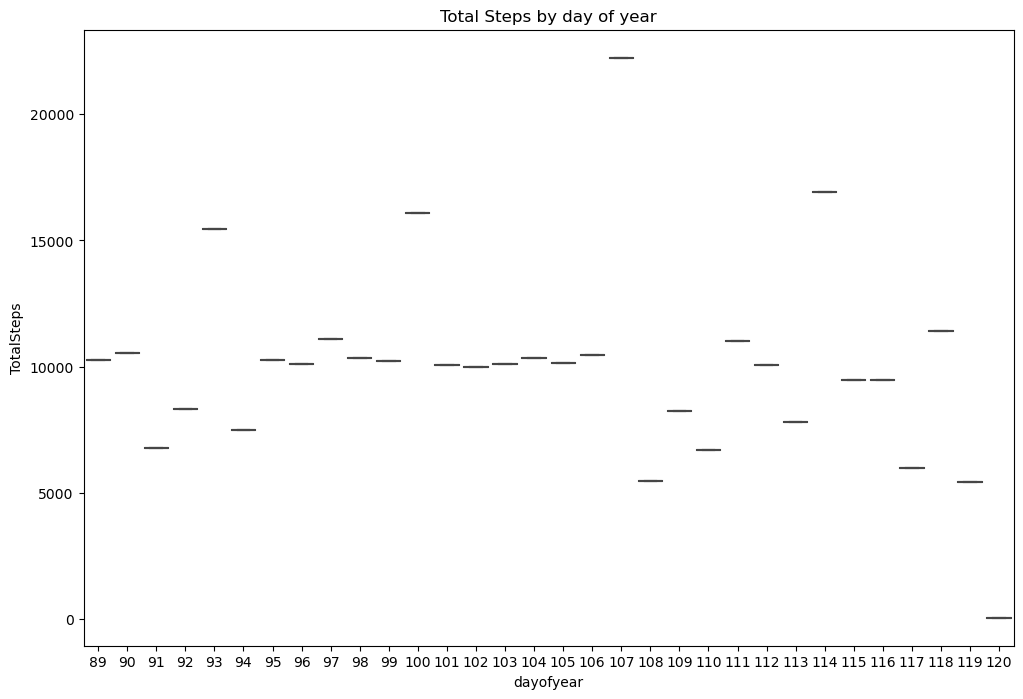

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=user_activity_daily_df, x='dayofyear', y='TotalSteps')
ax.set_title('Total Steps by day of year')
plt.ylabel('TotalSteps')
plt.show()

## Split data into train and test datasets

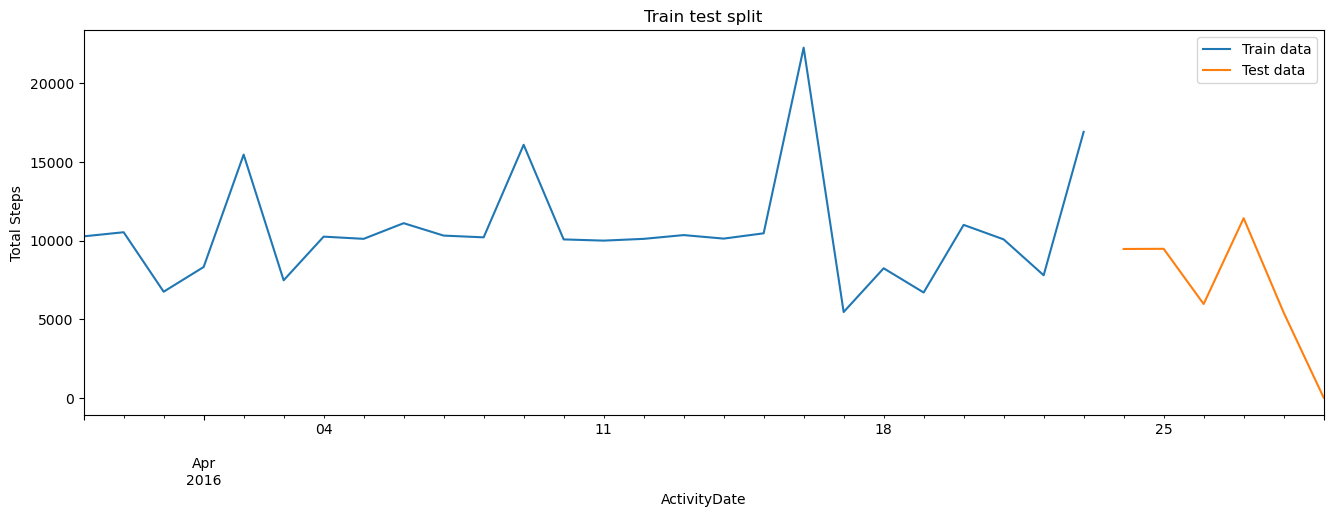

In [16]:
train_split = 0.80
train_size = int(np.round(train_split * len(user_activity_daily_df.values)))

train_data = user_activity_daily_df[:train_size]
test_data = user_activity_daily_df[train_size:]

fig, ax = plt.subplots(figsize=(16,5))
train_data['TotalSteps'].plot(ax=ax, label='Train data') # style='.')
test_data['TotalSteps'].plot(ax=ax, label='Test data') # style='.')
ax.legend(['Train data', 'Test data'])

plt.title('Train test split')
plt.ylabel(f'Total Steps')
plt.show()

## Splitting out features and targets:

In [17]:
X_cols = ['dayofweek', 'dayofmonth', 'isweekend', 'dayofyear']
y_col = 'TotalSteps'

X_train, y_train = train_data[X_cols], train_data[y_col]
X_test, y_test = test_data[X_cols], test_data[y_col]


# Modelling

In [18]:
# XGBoost model:
xgbr = xgb.XGBRegressor(learning_rate=0.01, n_estimators=1000, early_stopping_rounds=50, max_depth=3)

# Fit the model to the training data
xgbr.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)

[0]	validation_0-rmse:11094.11253	validation_1-rmse:7819.74744
[100]	validation_0-rmse:4870.87269	validation_1-rmse:4241.11302
[200]	validation_0-rmse:2420.40390	validation_1-rmse:4103.54409
[241]	validation_0-rmse:1911.66845	validation_1-rmse:4117.91123


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Feature importance

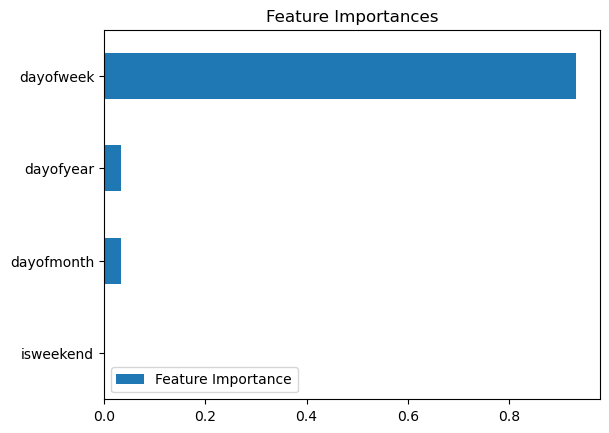

In [19]:
feature_importances = pd.DataFrame(data=xgbr.feature_importances_,
             index=xgbr.feature_names_in_,
             columns=['Feature Importance'])
feature_importances.sort_values('Feature Importance').plot(kind='barh')
plt.title('Feature Importances')
plt.show()

# Get predictions with test set

/var/folders/jn/tpkp2dnx08592l_y59z9_f3m0000gn/T/ipykernel_40697/2082075571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['total_steps_pred'] = predictions


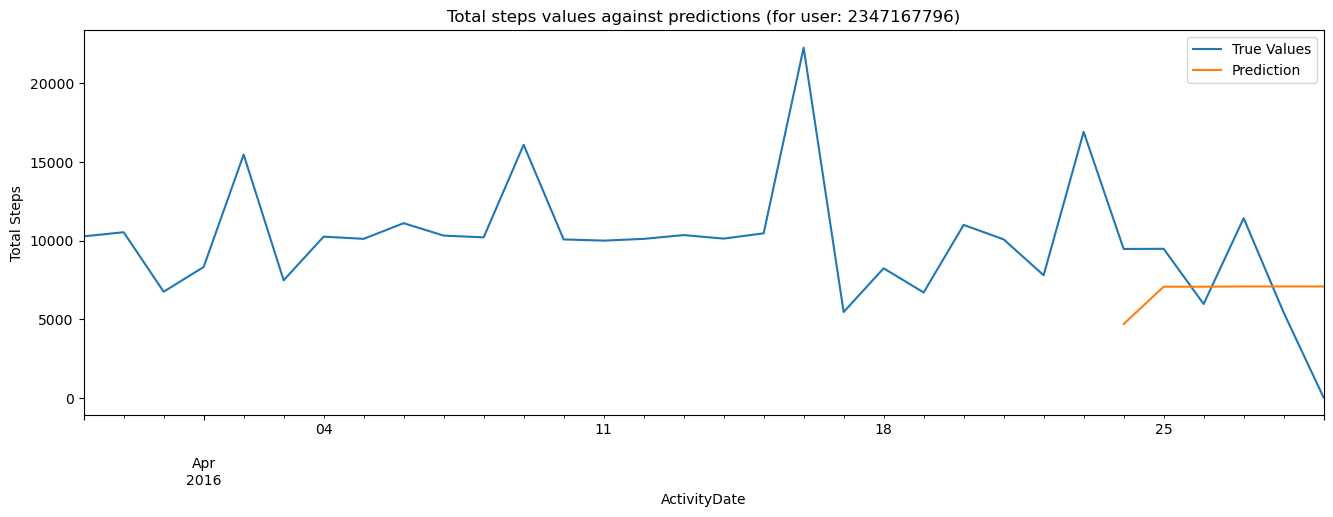

In [20]:
predictions = xgbr.predict(X_test)
test_data['total_steps_pred'] = predictions

# combine the predictions and raw data together
user_activity_daily_df_preds_full = user_activity_daily_df.merge(test_data[['total_steps_pred']], how='left', left_index=True, right_index=True)

# plot both true value and prediction lines
ax = user_activity_daily_df_preds_full[['TotalSteps']].plot(figsize=(16, 5))
user_activity_daily_df_preds_full['total_steps_pred'].plot(ax=ax)

plt.title(f'Total steps values against predictions (for user: {selected_user})')
plt.ylabel('Total Steps')
plt.legend(['True Values', 'Prediction'])
plt.show()

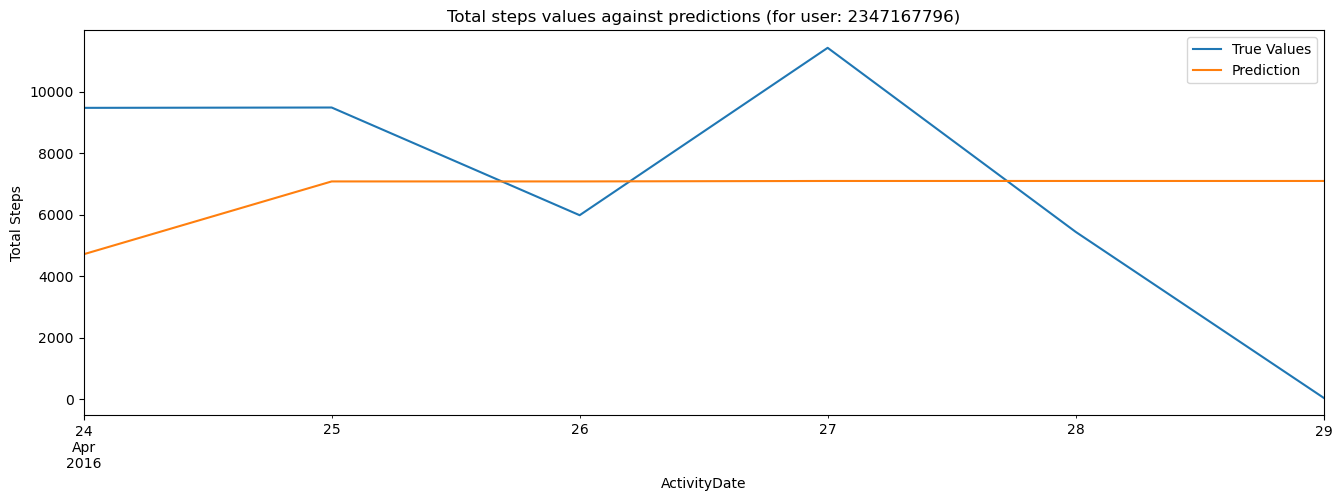

In [21]:
# combine the predictions and raw data together
user_activity_daily_df_preds = user_activity_daily_df.merge(test_data[['total_steps_pred']], how='right', left_index=True, right_index=True)

# plot both true value and prediction lines
ax = user_activity_daily_df_preds[['TotalSteps']].plot(figsize=(16, 5))
user_activity_daily_df_preds['total_steps_pred'].plot(ax=ax)

plt.title(f'Total steps values against predictions (for user: {selected_user})')
plt.ylabel('Total Steps')
plt.legend(['True Values', 'Prediction'])
plt.show()

In [22]:
rmse = np.sqrt(mean_squared_error(test_data['TotalSteps'], test_data['total_steps_pred']))
print(f'RMSE on Test dataset: {rmse:0.2f}')

RMSE on Test dataset: 4099.89


In [23]:
# Note: better for comparing against models with different scales:
nrmsd = rmse / (max(test_data['TotalSteps']) - min(test_data['TotalSteps']))
print(f'Normalized Root-Mean-Square Deviation : {nrmsd:0.2f}')

Normalized Root-Mean-Square Deviation : 0.36


In [24]:
# fairly poor performance compared with the hourly data due to the lack of data points